In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import get_m_values, get_m_values_numpy, dist_w, dist_f
from scipy.stats import wasserstein_distance


# Preparation

In [13]:
df = pd.read_csv('../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']
m_values = get_m_values(df)

In [5]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(len(df)), train_size=0.5, random_state=321)
X_train, X_test = df[cols_cont].values[idx_train], df[cols_cont].values[idx_test]
m_train, m_test = m_values[idx_train], m_values[idx_test]


# KDE

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

rows = []
for pow in [-2, -1, 0, 1]:
    kde = KernelDensity(kernel='gaussian', bandwidth=10 ** pow)
    kde.fit(X_train)

    X_sampled = kde.sample(len(X_test), random_state=321)
    df_sampled = pd.DataFrame(X_sampled, columns=cols_cont)
    m_sampled = get_m_values(df_sampled)
    m_sampled = m_sampled[~np.isnan(m_sampled)]
    
    rows.append({
        'b': '10^{' + str(pow) + '}',
        'w_m': wasserstein_distance(m_test, m_sampled),
        'w_avg': dist_w(X_test, X_sampled),
        'f': dist_f(X_test, X_sampled),
    })
df_res = pd.DataFrame.from_records(rows)

/Users/tomasraila/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomasraila/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
print(wasserstein_distance(m_test, m_sampled))
print(dist_w(X_test, X_sampled))
print(dist_f(X_test, X_sampled))

5.6421830491654115
2.214485839037571
0.5601341368414785


In [62]:
print(df_res.to_latex(float_format='%.3f', index=False))

\begin{tabular}{lrrr}
\toprule
      b &    w\_m &  w\_avg &     f \\
\midrule
10\textasciicircum \{-2\} &  5.643 &  2.214 & 0.560 \\
10\textasciicircum \{-1\} &  5.655 &  2.214 & 0.560 \\
 10\textasciicircum \{0\} &  5.879 &  2.210 & 0.560 \\
 10\textasciicircum \{1\} & 13.653 &  2.740 & 0.553 \\
\bottomrule
\end{tabular}



/var/folders/df/z290lq712tgg_xpn112v8bz80000gn/T/ipykernel_3741/2563426173.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.to_latex(float_format='%.3f', index=False))


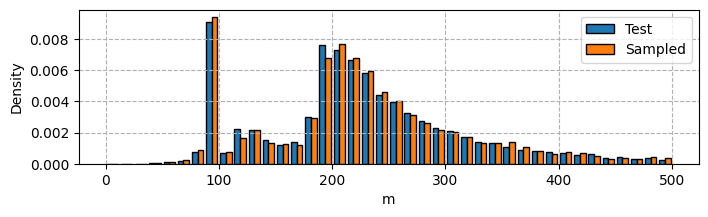

In [65]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(X_train)

X_sampled = kde.sample(len(X_test), random_state=321)
df_sampled = pd.DataFrame(X_sampled, columns=cols_cont)
m_sampled = get_m_values(df_sampled)
m_sampled = m_sampled[~np.isnan(m_sampled)]

plt.figure(figsize=(8, 2), dpi=100)
plt.hist([m_test, m_sampled], bins=40, range=(0, 500), density=True, edgecolor='black', label=['Test', 'Sampled'])
plt.grid(linestyle='--')
plt.legend()
plt.ylabel('Density')
plt.xlabel('m')
# plt.show()
plt.savefig('./images/kde_test_vs_sampled.png', bbox_inches='tight')